Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Veri setinin yüklenmesi

In [3]:
veri = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/YapayZekaOdevleri/train.csv")

Sınıf sayısının belirlenmesi

In [4]:
label_encoder = LabelEncoder().fit(veri.price_range)
labels = label_encoder.transform(veri.price_range)
classes = list(label_encoder.classes_)

Girdi ve Çıktı verilerinin hazırlanması


In [5]:
X = veri.drop(["price_range"], axis=1)
y = labels

Verilerin Standartlaştırılması

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Eğitim ve test verilerinin hazırlanması

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Çıktı Değerlerinin Kategorileştirilmesi

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Modelin Oluşturulması

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model= Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential, built=True>>

Modelin derlenmesi

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Modelin eğitilmesi

In [13]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2484 - loss: 1.5581 - val_accuracy: 0.2650 - val_loss: 1.4188
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2834 - loss: 1.4032 - val_accuracy: 0.3025 - val_loss: 1.3505
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3581 - loss: 1.3353 - val_accuracy: 0.3625 - val_loss: 1.2885
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4125 - loss: 1.2592 - val_accuracy: 0.4200 - val_loss: 1.2114
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4705 - loss: 1.1639 - val_accuracy: 0.4675 - val_loss: 1.1082
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5264 - loss: 1.0801 - val_accuracy: 0.5625 - val_loss: 0.9884
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5863 - loss: 0.9508 - val_accuracy: 0.6325 - val_loss: 0.8702
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.8398 - val_accuracy: 0.6825 - 

Eğitim ve Doğrulama başarımlarının gösterilmesi

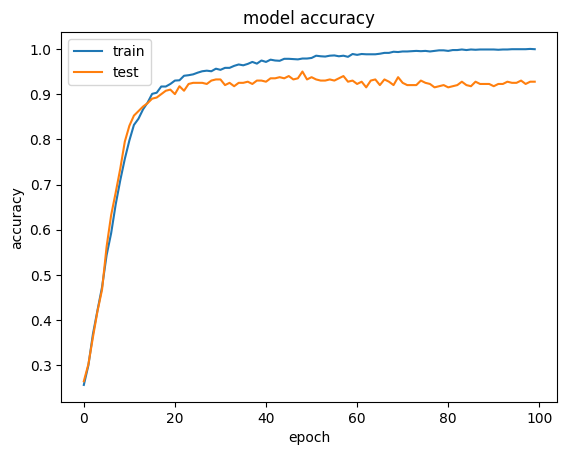

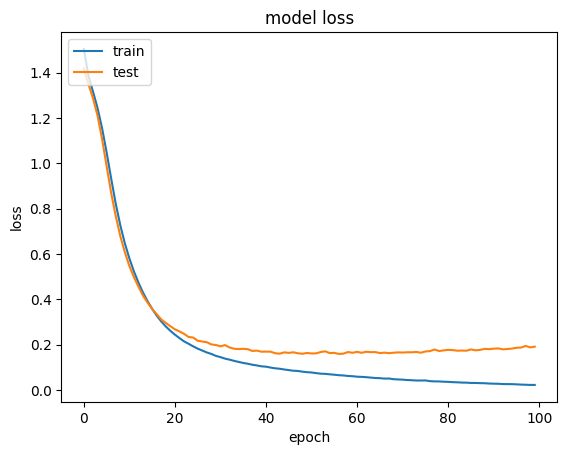

In [15]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')